# mnist-text

In [8]:
import datasets

data = datasets.load_dataset('Fraser/mnist-text', cache_dir='cache')

txt = data['train'][0]['text']

Using custom data configuration default
Reusing dataset mnist_text (cache/mnist_text/default/0.0.0/faaee49bf0aaca860e8620f07f81fcdac3d2cf5bad2ff29f593755510a639c67)


00 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
01 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
02 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
03 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
04 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
05 down ! ! ! ! ! ! ! ! ! ! ! ! ! % % % @ C L ' J a ^ @ ! ! ! !
06 down ! ! ! ! ! ! ! ! ( * 8 G K ` ` ` ` ` Y L ` ] Q 1 ! ! ! !
07 down ! ! ! ! ! ! ! - \ ` ` ` ` ` ` ` ` _ 8 5 5 / * ! ! ! ! !
08 down ! ! ! ! ! ! ! % W ` ` ` ` ` R N ^ ] ! ! ! ! ! ! ! ! ! !
09 down ! ! ! ! ! ! ! ! 5 H ; ` ` T # ! + G ! ! ! ! ! ! ! ! ! !
10 down ! ! ! ! ! ! ! ! ! $ ! G ` 7 ! ! ! ! ! ! ! ! ! ! ! ! ! !
11 down ! ! ! ! ! ! ! ! ! ! ! C ` P ! ! ! ! ! ! ! ! ! ! ! ! ! !
12 down ! ! ! ! ! ! ! ! ! ! ! # P ` 2 ! ! ! ! ! ! ! ! ! ! ! ! !
13 down ! ! ! ! ! ! ! ! ! ! ! ! ) ] Y I < ! ! ! ! ! ! ! ! ! ! !
14 down ! ! ! ! ! ! ! ! ! ! ! ! ! 5 ] ` ` > ' ! ! ! ! ! ! ! ! !
15 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! , O 

In [20]:
from tqdm import tqdm
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('funnel-transformer/intermediate')

sizes = []
for i, sample in tqdm(enumerate(data['train'])):
    text = sample['text']
    sizes.append(
        len(tokenizer(text)['input_ids'])
    )
    if i > 10: break

0it [00:00, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (842 > 512). Running this sequence through the model will result in indexing errors
11it [00:00, 197.08it/s]


842


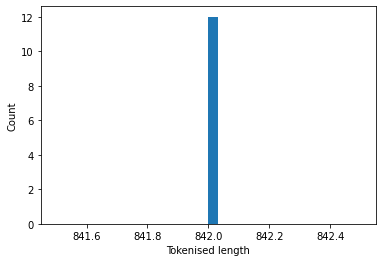

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(sizes[0])

plt.hist(sizes, bins=30)  # density=False would make counts
# plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Tokenised length');

In [121]:
from tqdm import tqdm
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('gpt2-medium')

sizes = []
for i, sample in tqdm(enumerate(data['train'])):
    text = sample['text']
    sizes.append(
        len(tokenizer(text)['input_ids'])
    )
    if i > 10: break

11it [00:00, 660.54it/s]

237


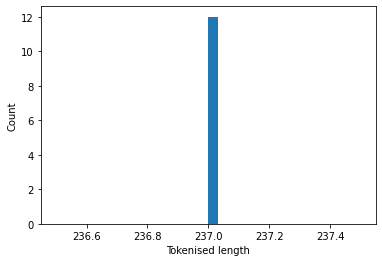

In [122]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(sizes[0])

plt.hist(sizes, bins=30)  # density=False would make counts
# plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Tokenised length');

In [30]:
import datasets

data = datasets.load_dataset('Fraser/mnist-text-small', cache_dir='cache')

print(data['train'][0]['text'])

Using custom data configuration default
Reusing dataset mnist_text_small (cache/mnist_text_small/default/0.0.0/7c63863d7a54708aade649317cb18140081f0d87355dc7f1ccb1666595eb7a0e)


00 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
01 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
02 down ! ! ! ! ! ! % % C L a ^ ! !
03 down ! ! ! - ` ` ` ` ` Y ` Q ! !
04 down ! ! ! % ` ` ` R ^ ! ! ! ! !
05 down ! ! ! ! $ G ` ! ! ! ! ! ! !
06 down ! ! ! ! ! # ` Y < ! ! ! ! !
07 down ! ! ! ! ! ! 5 ` ` F ! ! ! !
08 down ! ! ! ! ! ! ! % ` ` 1 ! ! !
09 down ! ! ! ! ! ! F ` ` ` ! ! ! !
10 down ! ! ! ! 1 ` ` ` ` 4 ! ! ! !
11 down ! ! L ` ` ` ` 5 ! ! ! ! ! !
12 down ! ! ` ` V B ! ! ! ! ! ! ! !
13 down ! ! ! ! ! ! ! ! ! ! ! ! ! !


In [33]:
from tqdm import tqdm
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('t5-base')

sizes = []
for i, sample in tqdm(enumerate(data['train'])):
    text = sample['text']
    sizes.append(
        len(tokenizer(text)['input_ids'])
    )
    if i > 100: break

101it [00:00, 592.20it/s]


406


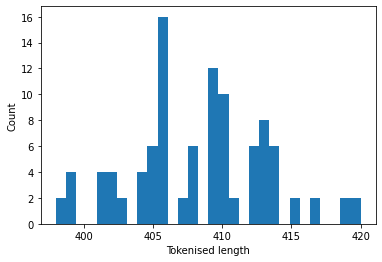

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print(sizes[0])

plt.hist(sizes, bins=30)  # density=False would make counts
# plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Tokenised length');

In [37]:
sizes[0], sizes[2]

(406, 408)

In [104]:
s = ''
for i in range(64 + 30):
    s += ' ' + chr(i + 33)


print(s.strip())
print('')
print(
    tokenizer.decode(tokenizer.encode(s), clean_up_tokenization_spaces=False)
)

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p q r s t u v w x y z { | } ~



ValueError: invalid literal for int() with base 10: ' '

In [78]:
len("""! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ;""".split())

27

In [96]:
str_map = [chr(i + 33) for i in range(27)] + [chr(i + 33) for i in range(28, 59)] + [chr(i + 33) for i in range(64, 90)]

print(len(str_map))
print(' '.join(str_map))

84
! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ a b c d e f g h i j k l m n o p q r s t u v w x y z


In [97]:
print(
    tokenizer.decode(
        tokenizer.encode(' '.join([str_map])), clean_up_tokenization_spaces=False
    )
)

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; = > ? @ A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ a b c d e f g h i j k l m n o p q r s t u v w x y z</s>


In [109]:
print(
    tokenizer.convert_ids_to_tokens(tokenizer.encode('00 down ! ! !'))
)

['▁', '00', '▁down', '▁', '!', '▁', '!', '▁', '!', '</s>']


In [114]:
print(
    tokenizer.convert_ids_to_tokens(list(range(10)))
)

['<pad>', '</s>', '<unk>', '▁', 'X', '.', ',', 's', '▁the', 'a']


In [120]:
len(tokenizer.encode(data['train'][0]['text']))

406

In [117]:
print(len(data['train'][0]['text'].split()))

224


In [39]:
print(data['train'][0]['text'])

00 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
01 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
02 down ! ! ! ! ! ! % % C L a ^ ! !
03 down ! ! ! - ` ` ` ` ` Y ` Q ! !
04 down ! ! ! % ` ` ` R ^ ! ! ! ! !
05 down ! ! ! ! $ G ` ! ! ! ! ! ! !
06 down ! ! ! ! ! # ` Y < ! ! ! ! !
07 down ! ! ! ! ! ! 5 ` ` F ! ! ! !
08 down ! ! ! ! ! ! ! % ` ` 1 ! ! !
09 down ! ! ! ! ! ! F ` ` ` ! ! ! !
10 down ! ! ! ! 1 ` ` ` ` 4 ! ! ! !
11 down ! ! L ` ` ` ` 5 ! ! ! ! ! !
12 down ! ! ` ` V B ! ! ! ! ! ! ! !
13 down ! ! ! ! ! ! ! ! ! ! ! ! ! !


In [40]:
print(data['train'][2]['text'])

00 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
01 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
02 down ! ! ! ! ! ! ! \ ` ` ! ! ! !
03 down ! ! ! ! ! # Y ` ` ` ` ! ! !
04 down ! ! ! ! ! \ ` ` ` P a ! ! !
05 down ! ! ! ! J ` ` 3 ? ! ` J ! !
06 down ! ! ! / ` ] ( ! ! ! ` Q ! !
07 down ! ! ! ^ ` ! ! ! ! ! a R ! !
08 down ! ! ! ` Z ! ! ! " ` ` $ ! !
09 down ! ! ! ` Y ! ! = ` ` ! ! ! !
10 down ! ! ! ` ` Z ` ` X / ! ! ! !
11 down ! ! ! R ` ` ` E ! ! ! ! ! !
12 down ! ! ! ! ! ! ! ! ! ! ! ! ! !
13 down ! ! ! ! ! ! ! ! ! ! ! ! ! !


In [57]:
tokenizer.decode(tokenizer.encode(data['train'][2]['text']), clean_up_tokenization_spaces=False)

'00 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! 01 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! 02 down ! ! ! ! ! ! ! <unk> <unk> <unk> ! ! ! ! 03 down ! ! ! ! ! # Y <unk> <unk> <unk> <unk> ! ! ! 04 down ! ! ! ! ! <unk> <unk> <unk> <unk> P a ! ! ! 05 down ! ! ! ! J <unk> <unk> 3 ? ! <unk> J ! ! 06 down ! ! ! / <unk> ] ( ! ! ! <unk> Q ! ! 07 down ! ! ! <unk> <unk> ! ! ! ! ! a R ! ! 08 down ! ! ! <unk> Z ! ! ! " <unk> <unk> $ ! ! 09 down ! ! ! <unk> Y ! ! = <unk> <unk> ! ! ! ! 10 down ! ! ! <unk> <unk> Z <unk> <unk> X / ! ! ! ! 11 down ! ! ! R <unk> <unk> <unk> E ! ! ! ! ! ! 12 down ! ! ! ! ! ! ! ! ! ! ! ! ! ! 13 down ! ! ! ! ! ! ! ! ! ! ! ! ! !</s>'

In [56]:
' '.join(
    [tk.replace('▁', '') for tk in tokenizer.convert_ids_to_tokens(tokenizer(data['train'][2]['text'])['input_ids'])]
).strip()

'00 down  !  !  !  !  !  !  !  !  !  !  !  !  !  ! 01 down  !  !  !  !  !  !  !  !  !  !  !  !  !  ! 02 down  !  !  !  !  !  !  !  <unk>  <unk>  <unk>  !  !  !  ! 03 down  !  !  !  !  ! #  Y  <unk>  <unk>  <unk>  <unk>  !  !  ! 04 down  !  !  !  !  !  <unk>  <unk>  <unk>  <unk> P  a  !  !  !  05 down  !  !  !  ! J  <unk>  <unk> 3  ?  !  <unk> J  !  ! 06 down  !  !  !  /  <unk>  ] (  !  !  !  <unk> Q  !  ! 07 down  !  !  !  <unk>  <unk>  !  !  !  !  !  a R  !  ! 08 down  !  !  !  <unk> Z  !  !  ! "  <unk>  <unk> $  !  ! 09 down  !  !  !  <unk>  Y  !  ! =  <unk>  <unk>  !  !  !  ! 10 down  !  !  !  <unk>  <unk> Z  <unk>  <unk>  X  /  !  !  !  ! 11 down  !  !  ! R  <unk>  <unk>  <unk> E  !  !  !  !  !  ! 12 down  !  !  !  !  !  !  !  !  !  !  !  !  !  ! 13 down  !  !  !  !  !  !  !  !  !  !  !  !  !  ! </s>'

# python-lines sequence length

In [18]:
import datasets

data = datasets.load_dataset('Fraser/python-lines')

print(data['train'][0])

Using custom data configuration default
Reusing dataset python_lines (/Users/frasergreenlee/.cache/huggingface/datasets/python_lines/default/0.0.0/971b214e8a197505e27d58b6388f784cbd3b28732a956ee8fdfe3c44c0a709e1)


{'text': 'msg += " as .tar files. See testing/test_data/fake_examples/celeb_a_hq "'}


In [29]:
from tqdm import tqdm
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('funnel-transformer/intermediate')

sizes = []
for sample in tqdm(data['train']):
    text = sample['text']
    sizes.append(
        len(tokenizer(text)['input_ids'])
    )

 10%|█         | 194312/1852038 [00:28<04:03, 6803.68it/s]


KeyboardInterrupt: 

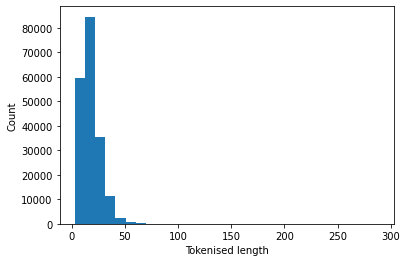

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(sizes, bins=30)  # density=False would make counts
# plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Tokenised length');

In [6]:
tokenizer

NameError: name 'tokenizer' is not defined